In [1]:
# libraries

import pandas as pd
import os

path = '/home/mikevelazko/Escritorio/Datasets_kaggle/Titanic'

In [2]:
def load_data(filename, path = path):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [3]:
df_train = load_data("train.csv")
df_test = load_data("test.csv")

The attributes have the following meaning:

   * Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
   * Pclass: passenger class.
   * Name, Sex, Age: self-explanatory
   * SibSp: how many siblings & spouses of the passenger aboard the Titanic.
   * Parch: how many children & parents of the passenger aboard the Titanic.
   * Ticket: ticket id
   * Fare: price paid (in pounds)
   * Cabin: passenger's cabin number
   * Embarked: where the passenger embarked the Titanic

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.hist(column = ["Age", "Pclass"], figsize = (16,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a6927f60>,
      dtype=object)

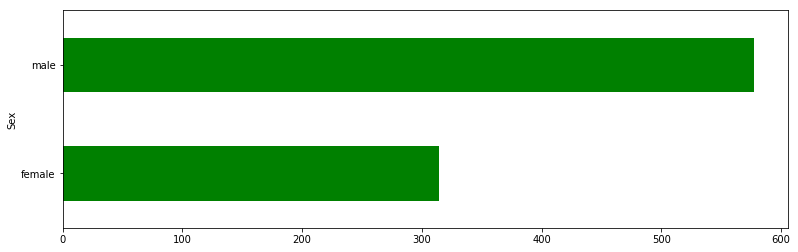

In [8]:
df_train.groupby(by = ["Sex"]).count().PassengerId.plot(kind = "barh", figsize = (13,4),
                                                        table = False, color = ['g'])

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

In [10]:
from sklearn.pipeline import Pipeline

try: 
    from sklearn.impute import SimpleImputer

except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", SimpleImputer(strategy = "median")),
])

In [11]:
num_pipeline.fit_transform(df_train)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [12]:
# A class to select numerial or categorical comuns
# Scikit lrearn does not handle df's

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index = X.columns)
        return self
    
    def transform(self, X, y = None):
        return X.fillna(self.most_frequent_)

In [13]:
from sklearn. pipeline import Pipeline

try:
    from sklearn.impute import SimpleImputer
    
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])), 
    ("imputer", SimpleImputer(strategy = "median")),
])

In [14]:
num_pipeline.fit_transform(df_train)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [15]:
# fill missing values for categorical strings

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index = X.columns)
        return self
    
    def transform(self, X, y = None):
        return X.fillna(self.most_frequent_)

In [16]:
try: 
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder

except ImportError:
    from future_encoders import OneHotEncoder

In [17]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("imputer", MostFrequentImputer()),
    ("cat_ecoder", OneHotEncoder(sparse = False)),    
])

In [18]:
cat_pipeline.fit_transform(df_train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [19]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [20]:
X_train = preprocess_pipeline.fit_transform(df_train)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [21]:
y_train = df_train["Survived"]

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = "auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
X_test = preprocess_pipeline.transform(df_test)
y_pred = svm_clf.predict(X_test)

# Support Vector Machine

In [24]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 11)
svm_scores.mean()

0.7375468779940324

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8149526160481217

# Grid Search for SVC

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel' : ('rbf',), 'C' : [1,10]}
grid_search = GridSearchCV(svm_clf, parameters, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('rbf',)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [28]:
svm_clf = SVC(C = 10.0, kernel = "rbf", gamma = "auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)
svm_scores.mean()

# Whitout grid search: 0.7375468779940324
# Whit grid search: 0.7453878674384292

0.7453878674384292

# Grid search for Random forest

In [29]:
parameters = {'n_estimators' : [50, 75, 100, 125], 'max_features': [2, 4, 6, 8]}

grid_search = GridSearchCV(forest_clf, parameters, cv = 7)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [30]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 125}

In [33]:
forest_clf = RandomForestClassifier(n_estimators = 100, max_features = 4, random_state = 42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8227928157984339